In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers.recurrent import LSTM,GRU
from tensorflow.keras import Input
# from pmdarima.arima import auto_arima
# For creating model and training
from tensorflow.keras.layers import *
# from tensorflow.keras.layers import MaxPooling1D, Flatten, Reshape, Activation
from tensorflow.keras import activations
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.models import Model
from keras import backend as K
from sklearn.decomposition import PCA
import mrmr


In [103]:
df = pd.read_csv('./processed_data.csv')
del df["Topix BOP"]
df = df[-1200:]
print(len(df))

1200


In [104]:
df.tail()

,Toei Adj Close,Nikkei Adj Close,Topix Adj Close,Toei Volume,Nikkei Volume,Topix Volume,Toei AD,Nikkei AD,Topix AD,Toei AMATe_LR_8_21_2,...,Topix TOS_STDEVALL_L_3,Toei TOS_STDEVALL_U_3,Nikkei TOS_STDEVALL_U_3,Topix TOS_STDEVALL_U_3,Toei TTM_TRND_6,Nikkei TTM_TRND_6,Topix TTM_TRND_6,Toei WCP,Nikkei WCP,Topix WCP
3563,0.005843,0.005333,0.002550,136.3,71800.0,142.5,1.885866e+07,2.024002e+10,4.154825e+06,1,...,743.262341,16325.496754,40379.593766,3190.586944,1,-1.0,-1.0,12022.5,27637.660156,1966.125
3564,0.040664,0.006860,0.001272,96.7,72300.0,47.8,1.888503e+07,2.024413e+10,4.144203e+06,1,...,743.602808,16326.879371,40382.403381,3190.927411,1,-1.0,-1.0,12027.5,27739.020508,1966.000
3565,-0.003190,0.008724,0.007876,89.2,83100.0,54.0,1.894119e+07,2.023723e+10,4.118624e+06,1,...,743.943276,16328.261988,40385.212996,3191.267879,1,1.0,-1.0,12455.0,27935.009766,1969.125
3566,-0.014400,0.002604,0.001765,86.0,71300.0,108.7,1.891519e+07,2.030131e+10,4.216719e+06,1,...,744.283743,16329.644605,40388.022611,3191.608346,1,1.0,1.0,12532.5,28112.999512,1978.875
3567,0.030032,-0.008824,-0.006291,122.9,66100.0,260.8,1.894817e+07,2.035039e+10,4.390585e+06,1,...,744.624211,16331.027222,40390.832226,3191.948814,1,1.0,1.0,12292.5,28206.169922,1985.000


In [286]:
boundedCols = []
for col in df.columns:
    mx, mn = df[col].max(), df[col].min()
    if mx - mn < 2.5:
        boundedCols.append(col)
        print(col, df[col].max(), df[col].min())

Toei Adj Close 0.1 -0.1
Nikkei Adj Close 0.0803810053104749 -0.0608083256921418
Topix Adj Close 0.068663257852447 -0.0570291777188328
Toei AMATe_LR_8_21_2 1 0
Nikkei AMATe_LR_8_21_2 1.0 0.0
Topix AMATe_LR_8_21_2 1.0 0.0
Toei AMATe_SR_8_21_2 1 0
Nikkei AMATe_SR_8_21_2 1.0 0.0
Topix AMATe_SR_8_21_2 1.0 0.0
Toei AOBV_LR_2 1 0
Nikkei AOBV_LR_2 1.0 0.0
Topix AOBV_LR_2 1.0 0.0
Toei AOBV_SR_2 1 0
Nikkei AOBV_SR_2 1.0 0.0
Topix AOBV_SR_2 1.0 0.0
Toei BOP 1.0 -1.0
Nikkei BOP 0.9898510317399272 -1.0
Toei CDL_INSIDE 1 -1
Nikkei CDL_INSIDE 1.0 -1.0
Topix CDL_INSIDE 1.0 -1.0
Toei DEC_1 1 0
Nikkei DEC_1 1.0 0.0
Topix DEC_1 1.0 0.0
Toei INC_1 1 0
Nikkei INC_1 1.0 0.0
Topix INC_1 1.0 0.0
Toei PSARaf_0.02_0.2 0.2 0.02
Nikkei PSARaf_0.02_0.2 0.2 0.02
Topix PSARaf_0.02_0.2 0.2 0.02
Toei PSARr_0.02_0.2 1 0
Nikkei PSARr_0.02_0.2 1.0 0.0
Topix PSARr_0.02_0.2 1.0 0.0
Toei SQZ_ON 1 0
Nikkei SQZ_ON 1.0 0.0
Topix SQZ_ON 1.0 0.0
Toei SQZ_OFF 1 0
Nikkei SQZ_OFF 1.0 0.0
Topix SQZ_OFF 1.0 0.0
Topix SQZ_NO 0.0 0.0
T

In [20]:
# X = df
# y = pd.Series(df["Toei Adj Close"])
# # print(y)
# importantFeatures = mrmr.mrmr_regression(X, y, 100)
# importantFeatures

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.20it/s]


['Toei Adj Close',
 'Nikkei Adj Close',
 'Topix Adj Close',
 'Nikkei THERMOs_20_2_0.5',
 'Toei CDL_DOJI_10_0.1',
 'Topix HA_low',
 'Topix AOBV_LR_2',
 'Topix CDL_DOJI_10_0.1',
 'Toei STC_10_12_26_0.5',
 'Nikkei CDL_INSIDE',
 'Topix SQZPRO_ON_WIDE',
 'Nikkei PVI_1',
 'Toei SUPERTd_7_3.0',
 'Topix HWU',
 'Topix AOBV_SR_2',
 'Toei CDL_INSIDE',
 'Nikkei PSARr_0.02_0.2',
 'Toei AMATe_LR_8_21_2',
 'Topix HWM',
 'Topix HWMA_0.2_0.1_0.1',
 'Toei STCstoch_10_12_26_0.5',
 'Toei AOBV_LR_2',
 'Toei SQZPRO_ON_NARROW',
 'Topix HWL',
 'Topix SQZPRO_OFF',
 'Toei AMATe_SR_8_21_2',
 'Nikkei Volume',
 'Topix HA_open',
 'Toei BOP',
 'Nikkei AOBV_LR_2',
 'Toei PSARaf_0.02_0.2',
 'Topix SSF_10_2',
 'Toei AOBV_SR_2',
 'Topix MCGD_10',
 'Nikkei AMATe_LR_8_21_2',
 'Topix LDECAY_5',
 'Topix HA_high',
 'Toei TTM_TRND_6',
 'Nikkei AOBV_SR_2',
 'Topix HA_close',
 'Topix OHLC4',
 'Nikkei AMATe_SR_8_21_2',
 'Topix HL2',
 'Nikkei PVR',
 'Topix THERMOl_20_2_0.5',
 'Topix HLC3',
 'Toei INC_1',
 'Topix WCP',
 'Topix NVI

In [339]:
look_back = 14
# def create_dataset(returns, volume, adj_close, MovingAvg, MACDh, MACDs):
#     dataX, dataY = [], []
#     dataAvg = []
#     for i in range(100, len(returns)-look_back-1):
# #         print(MovingAvg[i:i+look_back])
#         closeP = adj_close[i+look_back]
#         ma3 = np.average(adj_close[i+look_back-3:i+look_back])/closeP
#         ma12 = np.average(adj_close[i+look_back-12:i+look_back])/closeP
#         ma21 = np.average(adj_close[i+look_back-21:i+look_back])/closeP
#         ma30 = np.average(adj_close[i+look_back-30:i+look_back])/closeP
#         ma100 = np.average(adj_close[i+look_back-100:i+look_back])/closeP

#         a = np.vstack([
#             returns[i:i+look_back],
# #             MovingAvg[i:i+look_back]/MovingAvg[i]
#             np.where(MACDh[i:i+look_back] > MACDs[i:i+look_back],1,-1),
#         ]).T
#         dataX.append(a)
#         dataY.append(returns[i + look_back])
#         dataAvg.append([ma3, ma12, ma21, ma30, ma100])
#     return np.array(dataX), np.array(dataAvg), np.array(dataY)

def toArrLabel(y):
    if abs(y) < 0.01:
        return [0, 1, 0]
    elif y > 0:
        return [0, 0, 1]
    elif y < 0:
        return [1, 0, 0]

def toLabel(y):
    if abs(y) < 0.01:
        return 0
    elif y > 0:
        return 1
    elif y < 0:
        return 2


def toLog(y):
    return 1000*np.log(1+y)

# pca = PCA(n_components='mle', whiten=True)
# pca.fit(df)
# res = pca.transform(df)
# print(res.shape)
def create_dataset_class(target, rest):
    dataX, dataY = [], []
    for i in range(len(target)-look_back):
        a = np.vstack([
            target[i:i+look_back],
            rest[:,i:i+look_back],
        ]).T
        dataX.append(a)
        dataY.append(toArrLabel(target[i + look_back]))
    return np.array(dataX), np.array(dataY)

def create_dataset(target, rest):
    dataX, dataY = [], []
    for i in range(len(target)-look_back):
        a = np.vstack([
            toLog(target[i:i+look_back]),
            rest[:,i:i+look_back],
        ]).T
        dataX.append(a)
        dataY.append(toLabel(target[i + look_back]))
    return np.array(dataX), np.array(dataY)

toei= df["Toei Adj Close"].to_numpy()

rest = []
for col in df.columns:
    rest.append(df[col].to_numpy())

singleX, dataY = create_dataset(toei, np.array(rest))


train_count = 1000
val_count = 60

def splitData(arr):
    return arr[:train_count], arr[train_count:train_count+val_count], arr[train_count+val_count:]

classX, classY = create_dataset_class(toei, np.array(rest))
classX_train, classX_val, classX_test = splitData(classX)
classY_train, classY_val, classY_test = splitData(classY)

singleX_train, singleX_val, singleX_test = splitData(singleX)
dataY_train, dataY_val, dataY_test = splitData(dataY)

print(singleX_train.shape, dataY_train.shape)
# print(dataY.shape)
# print(np.sum(dataY, axis=0)/1188)
print(singleX_test.shape)

(1000, 14, 161) (1000,)
(126, 14, 161)


In [314]:
def signL(y_true, y_pred):
    y_prod = (y_true)*(y_pred)
    return tf.math.count_nonzero(tf.greater(y_prod, 0), dtype=tf.dtypes.float32)/ 32
mse = tf.keras.losses.MeanSquaredError()
def custom_loss(y_true, y_pred):
    return mse(y_true, y_pred) - signL(y_true, y_pred)

In [345]:
def sameSignPercent(ypred, ytrue):
    return np.count_nonzero(ypred*ytrue>0)/len(ypred)
def averageMagnitudes(ypred, ytrue):
    mask = np.where(ypred*ytrue>0, 1, 0)
    correctMag = np.sum(ypred*mask) / np.sum(mask)
    mask = np.where(ypred*ytrue<0, 1, 0)
    wrongMag = np.sum(ypred*mask) / np.sum(mask)
    return correctMag, wrongMag

def testModel(model):
    pTrain = model.predict(singleX_train).flatten()
    pVal = model.predict(singleX_val).flatten()
    print("Same sign for train data:",sameSignPercent(pTrain, dataY_train))
    print("Correct, Incorrect Mag", averageMagnitudes(pTrain, dataY_train))
    print("Same sign for val data:", sameSignPercent(pVal, dataY_val))
    print("Correct, Incorrect Mag", averageMagnitudes(pVal, dataY_val))

def testBinaryModel(model):
#     pTrain = model.predict(singleX_train).flatten()
    pVal = model.predict(singleX_val).flatten()
    good = 0
    bad = 0
    for val, target in zip(pVal, dataY_val):
        if val > 0.99 and target==1:
            good+=1
        elif val < 0.01 and target==0:
            good+=1
        else:
            bad+=1
    print(good, bad)
def testMultiClassModel(model):
#     pTrain = model.predict(singleX_train).flatten()
    pVal = model.predict(singleX_val)
#     print(pVal[-1])
    print(pVal.shape)
    for arr, yTrue in zip(pVal, classY_val):
        print(arr, yTrue)
        if arr[1] > 0.5 and yTrue[1]==1:
            print("Correct")
            print(arr)
        elif arr[1] > 0.5:
            print("Wrong")
            print(arr)
        

In [348]:
# multiModel = Sequential()
# multiModel.add(GRU(16, input_shape=(multiX.shape[1], multiX.shape[2])))
# multiModel.add(Dense(1))
# multiModel.compile(loss='mse', optimizer='sgd')

featureCount = singleX.shape[2]
# x = Input(shape=(look_back, 3))
# # attention_layer = MultiHeadAttention(num_heads=4, key_dim=3)
# # attention = attention_layer(x, x)
# lstmed = LSTM(8, return_sequences=False)(x)
# dense = Dense(1)(lstmed)
# # singleModel = Model(inputs=[x], outputs=dense)
# # conv1 = Conv2D(8, kernel_size=3, activation='relu',padding='same', input_shape=(look_back, 6))(x)
# # merged = Concatenate()([x, conv1])
# # lstmed = Bidirectional(LSTM(32, return_sequences=False))(merged)
# # merged2 = Concatenate()([Flatten()(x), lstmed])

# # conv2 = Conv1D(32, kernel_size=3, padding='same', activation='relu')(lstmed)
# # flat = Flatten()(conv2)
# # dense = Dense(1)(lstmed)
# singleModel = Model(inputs=[x], outputs=dense)

ensemble = []
def finalStep(model):
    model.add(Flatten())
#     model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer= "sgd", metrics=['accuracy'])
#     ensemble.append(model)

for hidden_size in [64]:
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add(GRU(hidden_size, return_sequences=False))
    finalStep(model)

for hidden_size in [64]:
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add(LSTM(hidden_size, return_sequences=False))
    finalStep(model)

for hidden_size in [32]:
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add(Bidirectional(LSTM(hidden_size, return_sequences=False)))
    finalStep(model)
    
for hidden_size in [64]:
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add((Conv1D(hidden_size*2, kernel_size=3, activation='relu')))
    model.add(LSTM(hidden_size, return_sequences=False))
    finalStep(model)

for hidden_size in [64]:
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add((Conv1D(hidden_size*2, kernel_size=3, activation='relu')))
    model.add(LSTM(hidden_size, return_sequences=True))
    model.add((Conv1D(hidden_size//2, kernel_size=3, activation='relu')))

    finalStep(model)
    
model = Sequential()
model.add(Input(shape=(look_back, featureCount)))
model.add((Conv1D(32, kernel_size=3, activation='relu')))
# model.add(MaxPooling1D(2))
finalStep(model)

model = Sequential()
model.add(Input(shape=(look_back, featureCount)))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(GRU(32, return_sequences=False))
finalStep(model)

# singleModel.add((Conv1D(128, kernel_size=5, activation='relu')))
# # singleModel.add(Bidirectional(LSTM(32, return_sequences=True)))
# singleModel.add(Dropout(0.5))

# # singleModel.add(Bidirectional(LSTM(32, return_sequences=True)))
# singleModel.add((Conv1D(64, kernel_size=3, activation='relu')))
# # singleModel.add(Bidirectional(LSTM(32, return_sequences=False)))
# singleModel.add((Conv1D(64, kernel_size=3, activation='relu')))
# singleModel.add((Conv1D(64, kernel_size=15, activation='relu')))

# singleModel.add(Dropout(0.5))
# singleModel.add(Flatten())
# singleModel.add(Dense(1, activation='linear'))
# K.set_value(model.optimizer.learning_rate, 0.0001)
# K.set_value(singleModel.optimizer.learning_rate, 0.00001)
# singleModel.add(Conv2D(64, kernel_size=3, activation='relu', data_format='channels_last'))
# singleModel.add(Reshape((98, -1)))
    
    
# singleModel.add(Bidirectional(LSTM(32, return_sequences=True)))
# # singleModel.add(Flatten())
# singleModel.add((Conv1D(32, kernel_size=3, activation='relu')))
# singleModel.add(Flatten())
# singleModel.add(Dense(1, activation='linear'))
# # singleModel.compile(optimizer='adam', loss='mse')
# singleModel.compile(optimizer='adam', loss='mse')
# print(singleModel.summary())
def createRNN_model():
    model = Sequential()
    model.add(Input(shape=(look_back, featureCount)))
    model.add(Dropout(0.8))
#     model.add(BatchNormalization())
#     model.add((Conv1D(64, kernel_size=3, padding='same', activation='relu')))
#     model.add((Conv1D(32, kernel_size=3, padding='same', activation='relu')))
#     model.add(LSTM(32, return_sequences=False))
#     model.add(Dense(48, activation='relu'))
    model.add(Dense(32, activation='relu'))
#     model.add(Dense(48, activation='relu'))
#     model.add(Dense(32, activation='relu'))
    model.add(GRU(32, return_sequences=False))
#     model.add(Dropout(0.5))

#     model.add((Conv1D(8, kernel_size=3, activation='relu')))
    finalStep(model)
#     print(model.summary())

    return model
path = './tmp'
save_best_model = ModelCheckpoint(path, monitor='val_accuracy', save_best_only=True)
model = createRNN_model()
history = model.fit(singleX_train, classY_train, validation_data=(singleX_val, classY_val), batch_size=64, epochs=25,
                   callbacks=[save_best_model]
                   )
# model.load_weights(path)KerasClassifier
# testModel(model)

# splits = 4
# split_ensemble = []
# for model in ensemble:
#     model.compile(optimizer='sgd', loss='mse', metrics=[signL])
#     model.fit(singleX_train, dataY_train, validation_data=(singleX_val, dataY_val), batch_size=32, epochs=25, shuffle=True)
#     print(model.summary())
#     split_size = train_count//splits
#     for k in range(splits):
#         train = singleX_train[split_size*k:split_size*k+split_size]
#         test  = dataY_train[split_size*k:split_size*k+split_size]
#         splitModel = tf.keras.models.clone_model(model)
#         splitModel.compile(optimizer='sgd', loss='mse', metrics=[signL])
#         splitModel.fit(train, test, validation_data=(singleX_val, dataY_val), batch_size=32, epochs=25, shuffle=True)
#         print(splitModel.summary())
#         split_ensemble.append(splitModel)

Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.3400

INFO:tensorflow:Assets written to: .\tmp\assets


INFO:tensorflow:Assets written to: .\tmp\assets


16/16 [==============================] - 6s 291ms/step - loss: 1.3198 - accuracy: 0.3400 - val_loss: 1.1269 - val_accuracy: 0.2500
Epoch 2/25
16/16 [==============================] - 0s 13ms/step - loss: 1.3064 - accuracy: 0.3470 - val_loss: 1.1557 - val_accuracy: 0.2500
Epoch 3/25
16/16 [==============================] - 0s 14ms/step - loss: 1.3163 - accuracy: 0.3430 - val_loss: 1.1013 - val_accuracy: 0.2500
Epoch 4/25
16/16 [==============================] - 0s 14ms/step - loss: 1.2501 - accuracy: 0.3950 - val_loss: 1.0760 - val_accuracy: 0.2333
Epoch 5/25
16/16 [==============================] - 0s 14ms/step - loss: 1.2210 - accuracy: 0.3750 - val_loss: 1.0680 - val_accuracy: 0.2333
Epoch 6/25
16/16 [==============================] - 0s 14ms/step - loss: 1.2308 - accuracy: 0.3780 - val_loss: 1.0627 - val_accuracy: 0.2333
Epoch 7/25
16/16 [==============================] - ETA: 0s - loss: 1.2127 - accuracy: 0.3870

INFO:tensorflow:Assets written to: .\tmp\assets


INFO:tensorflow:Assets written to: .\tmp\assets


16/16 [==============================] - 14s 920ms/step - loss: 1.2127 - accuracy: 0.3870 - val_loss: 1.0028 - val_accuracy: 0.5667
Epoch 8/25
16/16 [==============================] - 0s 14ms/step - loss: 1.2179 - accuracy: 0.3840 - val_loss: 1.0974 - val_accuracy: 0.2333
Epoch 9/25
16/16 [==============================] - 0s 14ms/step - loss: 1.1691 - accuracy: 0.3830 - val_loss: 1.0812 - val_accuracy: 0.2333
Epoch 10/25
16/16 [==============================] - 0s 14ms/step - loss: 1.1970 - accuracy: 0.3790 - val_loss: 1.0913 - val_accuracy: 0.2500
Epoch 11/25
16/16 [==============================] - 0s 13ms/step - loss: 1.1725 - accuracy: 0.3740 - val_loss: 1.0904 - val_accuracy: 0.2500
Epoch 12/25
16/16 [==============================] - 0s 14ms/step - loss: 1.1761 - accuracy: 0.3730 - val_loss: 1.0989 - val_accuracy: 0.2500
Epoch 13/25
16/16 [==============================] - 0s 13ms/step - loss: 1.1742 - accuracy: 0.3570 - val_loss: 1.0949 - val_accuracy: 0.2500
Epoch 14/25
16/16 

In [349]:
testMultiClassModel(model)

2/2 [==============================] - 0s 7ms/step
(60, 3)
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [0 0 1]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [0 0 1]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [0 0 1]
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [0 0 1]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.30125424 0.2987559  0.39998978] [0 1 0]
[0.3142667  0.37972903 0.30600417] [1 0 0]
[0.3142667  0.37972903 0.30600417] [0 1 0]
[0.3142667  0.37972903 0.30600417] [0 

In [201]:

x = Input(shape=(look_back, featureCount))
res = []
for model in ensemble:
    model.trainable = False
    res.append(model(x))
print(x.shape)
flat = x[:,-1,:]
# Predict prob distribution i.e weight to assign to each ensemble prediction
weights = Dense(len(res), activation='softmax')(flat)
combined = Concatenate()(res)

print(weights.shape)
print(combined.shape)
# d1 = Dense(64, activation='relu')(combined*weights)

# d2 = Dense(32)(combined)

# d3 = Dense(16)(d2)

# d4 = Dense(6, activation='relu')(d3)
    
out = tf.math.reduce_sum(combined*weights, axis=1)
print(out.shape)
multiModel = Model(inputs=[x], outputs=out)
multiModel.compile(loss="mse", optimizer= "adam", metrics=[signL])
multiModel.fit(singleX_train, dataY_train, validation_data=(singleX_test, dataY_test), batch_size=32, epochs=30, shuffle=True)
# recursiveModel = Sequential()
# recursiveModel.add(encoder)
# recursiveModel.add(GRU(20, return_sequences=False))
# recursiveModel.add(Dense(1, activation='linear'))
# recursiveModel.compile(optimizer='sgd', loss='mse', metrics=[signL])
# history=recursiveModel.fit(singleX_train, dataY_train, validation_data=(singleX_test, dataY_test), batch_size=80, epochs=100)

(None, 12, 68)


ValueError: A `Concatenate` layer should be called on a list of at least 1 input. Received: input_shape=()

In [77]:
# Option 1
# singleModel = Sequential()
# singleModel.add((Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, 2))))
# singleModel.add(Bidirectional(LSTM(16, return_sequences=False)))
# singleModel.add(Dense(1, activation='linear'))
# singleModel.compile(optimizer='adam', loss='mse')

# Option 2
# singleModel = Sequential()
# singleModel.add((Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, 2))))
# singleModel.add(Bidirectional(LSTM(32, return_sequences=False)))
# singleModel.add(Dense(1, activation='linear'))
# singleModel.compile(optimizer='adam', loss='mse')

# Option 3
# singleModel = Sequential()
# singleModel.add((Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, 2))))
# singleModel.add(Bidirectional(LSTM(32, return_sequences=False)))
# singleModel.add((Conv1D(32, kernel_size=3, activation='relu')))
# singleModel.add(Flatten())
# singleModel.add(Dense(1, activation='linear'))
# singleModel.compile(optimizer='adam', loss='mse')

In [78]:

# singleModel = Sequential()

# # Creating the Neural Network model here...
# # CNN layers
# singleModel.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, 1))))
# singleModel.add(TimeDistributed(MaxPooling1D(2)))
# singleModel.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
# singleModel.add(TimeDistributed(MaxPooling1D(2)))
# singleModel.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
# singleModel.add(TimeDistributed(MaxPooling1D(2)))
# singleModel.add(TimeDistributed(Flatten()))
# # model.add(Dense(5, kernel_regularizer=L2(0.01)))

# # LSTM layers
# singleModel.add(Bidirectional(LSTM(look_back, return_sequences=True)))
# singleModel.add(Dropout(0.5))
# singleModel.add(Bidirectional(LSTM(look_back, return_sequences=False)))
# singleModel.add(Dropout(0.5))

# #Final layers
# singleModel.add(Dense(1, activation='linear'))
# singleModel.compile(optimizer='adam', loss='mse')
# # history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

In [268]:
from scikeras.wrappers import BaseWrapper, ClassifierMixin
from typing import Any, Callable, Dict, Iterable, List, Mapping, Set, Tuple, Type, Union
from sklearn.preprocessing import LabelBinarizer

class KerasClassifierAni(BaseWrapper, ClassifierMixin):

    _estimator_type = "classifier"
    _tags = {
        "multilabel": True,
        "_xfail_checks": {
            "check_fit_idempotent": "tf does not use \
            sparse tensors",
            "check_no_attributes_set_in_init": "can only \
            pass if all params are hardcoded in __init__",
        },
        **BaseWrapper._tags,
    }

    def __init__(
        self,
        model: Union[None, Callable[..., tf.keras.Model], tf.keras.Model] = None,
        *,
        build_fn: Union[
            None, Callable[..., tf.keras.Model], tf.keras.Model
        ] = None,  # for backwards compatibility
        warm_start: bool = False,
        random_state: Union[int, np.random.RandomState, None] = None,
        optimizer: Union[
            str, tf.keras.optimizers.Optimizer, Type[tf.keras.optimizers.Optimizer]
        ] = "rmsprop",
        loss: Union[
            Union[str, tf.keras.losses.Loss, Type[tf.keras.losses.Loss], Callable], None
        ] = None,
        metrics: Union[
            List[
                Union[
                    str,
                    tf.keras.metrics.Metric,
                    Type[tf.keras.metrics.Metric],
                    Callable,
                ]
            ],
            None,
        ] = None,
        batch_size: Union[int, None] = None,
        validation_batch_size: Union[int, None] = None,
        verbose: int = 1,
        callbacks: Union[
            List[Union[tf.keras.callbacks.Callback, Type[tf.keras.callbacks.Callback]]],
            None,
        ] = None,
        validation_split: float = 0.0,
        shuffle: bool = True,
        run_eagerly: bool = False,
        epochs: int = 1,
        class_weight: Union[Dict[Any, float], str, None] = None,
        **kwargs,
    ):
        super().__init__(
            model=model,
            build_fn=build_fn,
            warm_start=warm_start,
            random_state=random_state,
            optimizer=optimizer,
            loss=loss,
            metrics=metrics,
            batch_size=batch_size,
            validation_batch_size=validation_batch_size,
            verbose=verbose,
            callbacks=callbacks,
            validation_split=validation_split,
            shuffle=shuffle,
            run_eagerly=run_eagerly,
            epochs=epochs,
            **kwargs,
        )
        self.classes_ = np.array([0, 1, 2])
        self.class_weight = class_weight



    @property
    def _fit_kwargs(self) -> Set[str]:
        # remove class_weight since KerasClassifier re-processes it into sample_weight
        return BaseWrapper._fit_kwargs - {"class_weight"}

    @staticmethod
    def scorer(y_true, y_pred, **kwargs) -> float:
        """Scoring function for KerasClassifier.
        KerasClassifier uses ``sklearn_accuracy_score`` by default.
        To change this, override this method.
        Parameters
        ----------
        y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels.
        y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
            Predicted labels.
        **kwargs: dict
            Extra parameters passed to the scorer.
        Returns
        -------
        float
            Score for the test data set.
        """
        return sklearn_accuracy_score(y_true, y_pred, **kwargs)

    @property
    def target_encoder(self):
        """Retrieve a transformer for targets / y.
        For ``KerasClassifier.predict_proba`` to
        work, this transformer must accept a ``return_proba``
        argument in ``inverse_transform`` with a default value
        of False.
        Metadata will be collected from ``get_metadata`` if
        the transformer implements that method.
        Override this method to implement a custom data transformer
        for the target.
        Returns
        -------
        sklearn-transformer
            Transformer implementing the sklearn transformer
            interface.
        """
#         categories = "auto" if self.classes_ is None else [self.classes_]
        return LabelBinarizer()

    def initialize(self, X, y) -> "KerasClassifier":
        """Initialize the model without any fitting.
        You only need to call this model if you explicitly do not want to do any fitting
        (for example with a pretrained model). You should _not_ call this
        right before calling ``fit``, calling ``fit`` will do this automatically.
        Parameters
        ----------
        X : Union[array-like, sparse matrix, dataframe, of shape (n_samples, n_features)
                Training samples where n_samples is the number of samples
                and `n_features` is the number of features.
        y : Union[array-like, dataframe,, of shape \
            (n_samples,) or (n_samples, n_outputs), default None
            True labels for X.
        Returns
        -------
        KerasClassifier
            A reference to the KerasClassifier instance for chained calling.
        """
#         self.classes_ = [0, 1, 2]
        super().initialize(X=X, y=y)
        return self

    def fit(self, X, y, sample_weight=None, **kwargs) -> "KerasClassifier":
        """Constructs a new classifier with ``model`` & fit the model to ``(X, y)``.
        Parameters
        ----------
        X : Union[array-like, sparse matrix, dataframe, of shape (n_samples, n_features)
            Training samples, where n_samples is the number of samples
            and n_features is the number of features.
        y : Union[array-like, dataframe,, of shape (n_samples,) or (n_samples, n_outputs)
            True labels for X.
        sample_weight : array-like of shape (n_samples,), default=None
            Array of weights that are assigned to individual samples.
            If not provided, then each sample is given unit weight.
        **kwargs : Dict[str, Any]
            Extra arguments to route to ``Model.fit``.
        Warnings
        --------
            Passing estimator parameters as keyword arguments (aka as ``**kwargs``) to ``fit`` is not supported by the Scikit-Learn API,
            and will be removed in a future version of SciKeras.
            These parameters can also be specified by prefixing ``fit__`` to a parameter at initialization
            (``KerasClassifier(..., fit__batch_size=32, predict__batch_size=1000)``)
            or by using ``set_params`` (``est.set_params(fit__batch_size=32, predict__batch_size=1000)``).
        Returns
        -------
        KerasClassifier
            A reference to the instance that can be chain called (``est.fit(X,y).transform(X)``).
        """
        self.classes_ = np.array([0, 1, 2])
        if self.class_weight is not None:
            sample_weight = 1 if sample_weight is None else sample_weight
            sample_weight *= compute_sample_weight(class_weight=self.class_weight, y=y)
        super().fit(X=X, y=y, sample_weight=sample_weight, validation_data=(singleX_val, classY_val), **kwargs)
        return self

    def partial_fit(
        self, X, y, classes=None, sample_weight=None, **kwargs
    ) -> "KerasClassifier":
        """Fit classifier for a single epoch, preserving the current epoch
        and all model parameters and state.
        Parameters
        ----------
        X : Union[array-like, sparse matrix, dataframe, of shape (n_samples, n_features)
            Training samples, where n_samples is the number of samples
            and n_features is the number of features.
        y : Union[array-like, dataframe,, of shape (n_samples,) or (n_samples, n_outputs)
            True labels for X.
        classes: ndarray of shape (n_classes,), default=None
            Classes across all calls to partial_fit. Can be obtained by via
            np.unique(y_all), where y_all is the target vector of the entire dataset.
            This argument is only needed for the first call to partial_fit and can be
            omitted in the subsequent calls. Note that y doesn’t need to contain
            all labels in classes. If you do not pass this argument, SciKeras
            will use ``classes=np.all(y)`` with the y passed in the first call.
        sample_weight : array-like of shape (n_samples,), default=None
            Array of weights that are assigned to individual samples.
            If not provided, then each sample is given unit weight.
        **kwargs : Dict[str, Any]
            Extra arguments to route to ``Model.fit``.
        Returns
        -------
        KerasClassifier
            A reference to the instance that can be chain called
            (ex: instance.fit(X,y).transform(X) )
        """
        self.classes_ = np.array([0, 1, 2])
        
        if self.class_weight is not None:
            sample_weight = 1 if sample_weight is None else sample_weight
            sample_weight *= compute_sample_weight(class_weight=self.class_weight, y=y)
        super().partial_fit(X, y, sample_weight=sample_weight, **kwargs)
        return self

    def predict_proba(self, X, **kwargs):
        """Returns class probability estimates for the given test data.
        Parameters
        ----------
        X : Union[array-like, sparse matrix, dataframe, of shape (n_samples, n_features)
            Training samples, where n_samples is the number of samples
            and n_features is the number of features.
        **kwargs : Dict[str, Any]
            Extra arguments to route to ``Model.predict``.
        Warnings
        --------
            Passing estimator parameters as keyword arguments (aka as ``**kwargs``) to ``predict_proba`` is not supported by the Scikit-Learn API,
            and will be removed in a future version of SciKeras.
            These parameters can also be specified by prefixing ``predict__`` to a parameter at initialization
            (``KerasClassifier(..., fit__batch_size=32, predict__batch_size=1000)``)
            or by using ``set_params`` (``est.set_params(fit__batch_size=32, predict__batch_size=1000)``).
        Returns
        -------
        array-like, shape (n_samples, n_outputs)
            Class probability estimates.
            In the case of binary classification,
            to match the scikit-learn API,
            SciKeras will return an array of shape (n_samples, 2)
            (instead of `(n_sample, 1)` as in Keras).
        """
        # call the Keras model's predict
        outputs = self._predict_raw(X=X, **kwargs)

        # post process y
#         y = self.target_encoder_.inverse_transform(outputs)

        return outputs

In [273]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier


scikeras.wrappers.KerasClassifier.target_encoder = LabelBinarizer()
# enc.fit(dataY)
# print(enc.transform(dataY))
ann_estimator = KerasClassifierAni(build_fn=createRNN_model, epochs=25, batch_size=32, verbose=1,    
                                callbacks=tf.keras.callbacks.EarlyStopping, callbacks__monitor="val_accuracy", callbacks__patience=1)
boosted_ann = AdaBoostClassifier(base_estimator=ann_estimator, n_estimators=50)

# # clf = AdaBoostRegressor(n_estimators=250, learning_rate=1)
boosted_ann.fit(singleX_train, dataY_train)

Epoch 1/25
29/29 [==============================] - 3s 28ms/step - loss: 0.0012 - accuracy: 0.4156 - val_loss: 1.1546 - val_accuracy: 0.3056
Epoch 2/25
29/29 [==============================] - 0s 3ms/step
Epoch 1/25
29/29 [==============================] - 2s 28ms/step - loss: 0.0013 - accuracy: 0.3200 - val_loss: 1.1514 - val_accuracy: 0.3056
Epoch 2/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3311 - val_loss: 1.1207 - val_accuracy: 0.3556
Epoch 3/25
29/29 [==============================] - 0s 3ms/step
Epoch 1/25
29/29 [==============================] - 3s 28ms/step - loss: 0.0013 - accuracy: 0.3456 - val_loss: 1.1255 - val_accuracy: 0.3500
Epoch 2/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3867 - val_loss: 1.1096 - val_accuracy: 0.3778
Epoch 3/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3733 - val_loss: 1.0963 - val_accuracy: 0.3833
Epoch 4/25
29/29 [========

29/29 [==============================] - 0s 3ms/step
Epoch 1/25
29/29 [==============================] - 3s 29ms/step - loss: 0.0013 - accuracy: 0.3033 - val_loss: 1.1641 - val_accuracy: 0.3222
Epoch 2/25
29/29 [==============================] - 0s 3ms/step
Epoch 1/25
29/29 [==============================] - 3s 29ms/step - loss: 0.0013 - accuracy: 0.3033 - val_loss: 1.1213 - val_accuracy: 0.3333
Epoch 2/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3022 - val_loss: 1.1273 - val_accuracy: 0.3389
Epoch 3/25
29/29 [==============================] - 0s 3ms/step
Epoch 1/25
29/29 [==============================] - 3s 28ms/step - loss: 0.0013 - accuracy: 0.3600 - val_loss: 1.1576 - val_accuracy: 0.3389
Epoch 2/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.3311 - val_loss: 1.1093 - val_accuracy: 0.3500
Epoch 3/25
29/29 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.3322 - val_loss: 1.1

AdaBoostClassifier(base_estimator=KerasClassifierAni(batch_size=32, build_fn=<function createRNN_model at 0x000001FC771798B0>, callbacks=<class 'keras.callbacks.EarlyStopping'>, callbacks__monitor='val_accuracy', callbacks__patience=1, epochs=25))

In [274]:
print(boosted_ann.estimators_[-1])
print(boosted_ann.estimator_weights_)

KerasClassifierAni(
	model=None
	build_fn=<function createRNN_model at 0x000001FC771798B0>
	warm_start=False
	random_state=1121250833
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=<class 'keras.callbacks.EarlyStopping'>
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	callbacks__monitor=val_accuracy
	callbacks__patience=1
	class_weight=None
)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [275]:
# print("Train Score", boosted_ann.score(singleX_train, dataY_train))
# print("Val Score", boosted_ann.score(singleX_val, dataY_val))
# print("Test Score", boosted_ann.score(singleX_test, dataY_test))
# print(boosted_ann.predict(singleX_test))
print("Train score", boosted_ann.score(singleX_train, dataY_train))
print("Val score", boosted_ann.score(singleX_val, dataY_val))
print("Test score", boosted_ann.score(singleX_test, dataY_test))

# for score in boosted_ann.staged_score(singleX_val, dataY_val):
#     print(score)
# testBinaryModel(boosted_ann)

# lastBoost = boosted_ann.estimators_[-1]
# testModel(lastBoost)

29/29 [==============================] - 0s 3ms/step
Train score 0.5877777777777777
6/6 [==============================] - 0s 3ms/step
Val score 0.37222222222222223
4/4 [==============================] - 0s 5ms/step
Test score 0.26851851851851855


<AxesSubplot:>

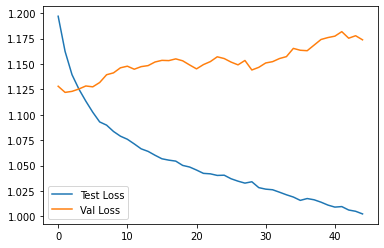

In [298]:
loss_df = pd.DataFrame()
loss_df["Test Loss"] = history.history['loss']
loss_df["Val Loss"] = history.history['val_loss']
loss_df = loss_df[:]
loss_df.plot()
#try normalizing columns

<AxesSubplot:>

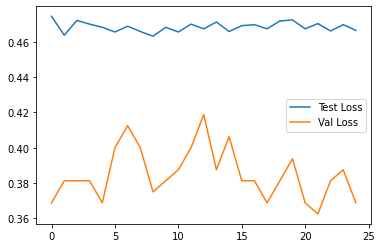

In [184]:
sign_df = pd.DataFrame()
sign_df["Test Loss"] = history.history['signL']
sign_df["Val Loss"] = history.history['val_signL']

sign_df.plot()

In [59]:
df_out = pd.read_csv('./processed_data.csv')
df_out = df[look_back-1:-1]

In [60]:
# df_out["single_predict"]=multiModel.predict(singleX)
df_out["single_predict"]=model.predict(singleX)
# df_out["multi_predict"]=multiModel.predict(multiX)
df_out["target"]=dataY

38/38 [==============================] - 1s 4ms/step


<AxesSubplot:>

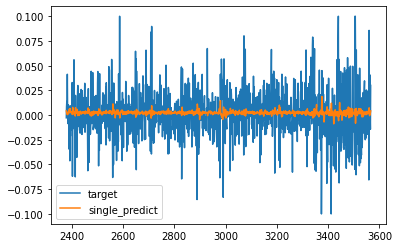

In [299]:

df_out.plot(y=["target", "single_predict"])

In [193]:
df_out.head()

,Toei Adj Close,Nikkei Adj Close,Topix Adj Close,Toei Volume,Nikkei Volume,Topix Volume,Toei AD,Nikkei AD,Topix AD,Toei AMATe_LR_8_21_2,...,Nikkei TOS_STDEVALL_U_3,Topix TOS_STDEVALL_U_3,Toei TTM_TRND_6,Nikkei TTM_TRND_6,Topix TTM_TRND_6,Toei WCP,Nikkei WCP,Topix WCP,single_predict,target
13,0.000000,0.040968,0.046876,0.084,0.1897,0.0,1.612777,0.531602,0.0,0,...,3.040546,1.975118,-1,-1.0,-1.0,0.073250,1.306821,1.29832,-0.000129,0.000000
14,0.000000,-0.039713,-0.038486,1.221,0.1788,0.0,1.600567,0.547866,0.0,0,...,3.040827,1.975458,-1,1.0,1.0,0.074208,1.353859,1.35918,-0.000161,-0.031818
15,-0.031818,0.029871,0.027776,0.315,0.1529,0.0,1.599641,0.532576,0.0,0,...,3.041108,1.975798,-1,-1.0,1.0,0.073542,1.319140,1.30687,-0.000140,0.046948
16,0.046948,-0.009929,-0.006626,1.431,0.1470,0.0,1.596991,0.544364,0.0,0,...,3.041389,1.976139,-1,1.0,1.0,0.071208,1.342230,1.34317,-0.000171,0.017937
17,0.017937,0.018542,0.020063,0.186,0.1524,0.0,1.598851,0.538393,0.0,0,...,3.041670,1.976479,1,1.0,1.0,0.073542,1.336883,1.33427,-0.000140,-0.011013


In [304]:
naive_prediction = df_out["target"].shift(-1).to_numpy()
print(naive_prediction)

[ 0.00830269  0.01372356  0.00541514 ... -0.0144      0.03003247
         nan]


In [305]:
def sign_score(listA, listB):
    if len(listA) != len(listB):
        raise "Lists must be the same length"
    return np.sum(np.where(listA*listB>0,1,0))/len(listA)
# sign_score(df["Log Returns"].to_numpy(), df["single_predict"].to_numpy())

In [306]:
sign_score(naive_prediction-1, df_out["target"].to_numpy())

0.47895622895622897

In [307]:
sign_score(df_out["target"].to_numpy()[-100:], df_out["single_predict"].to_numpy()[-100:])

0.43

In [308]:
sign_score(df_out["target"].to_numpy(), df_out["single_predict"].to_numpy())

0.49242424242424243

In [309]:
sign_score(df_out["target"].to_numpy(), df_out["single_predict"].to_numpy()+1000)

0.4882154882154882

In [172]:
good = []
bad = []
for target, prediction in zip(df_out["target"].to_numpy(), df_out["single_predict"].to_numpy()):
#     if abs(prediction)<0.01:
#         continue
    if target*prediction > 0:
        good.append(prediction)
    else:
        bad.append(prediction)
        

In [173]:
len(good), len(bad)

(1628, 1933)

In [168]:
np.mean(np.abs(np.array(good)))

0.028555106

In [169]:
np.mean(np.abs(np.array(bad)))

0.029233295

In [170]:
len(good)/ len(good+bad)

0.4568593615185505

In [171]:
singleModel.save("model_large_param")

INFO:tensorflow:Assets written to: model_large_param\assets


INFO:tensorflow:Assets written to: model_large_param\assets
